In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#hide
from nbdev.showdoc import *

In [3]:
import networkx as nx
G = nx.Graph()
G.add_weighted_edges_from(
                        [(0, 1, 4), 
                        (0, 4, 5),
                        (1, 2, 2),
                        (2, 3, 1),
                        (3, 0, 3)])


In [4]:
G.nodes


NodeView((0, 1, 4, 2, 3))

In [5]:
for e in G.edges:
    print(e)

(0, 1)
(0, 4)
(0, 3)
(1, 2)
(2, 3)


<IPython.core.display.Javascript object>


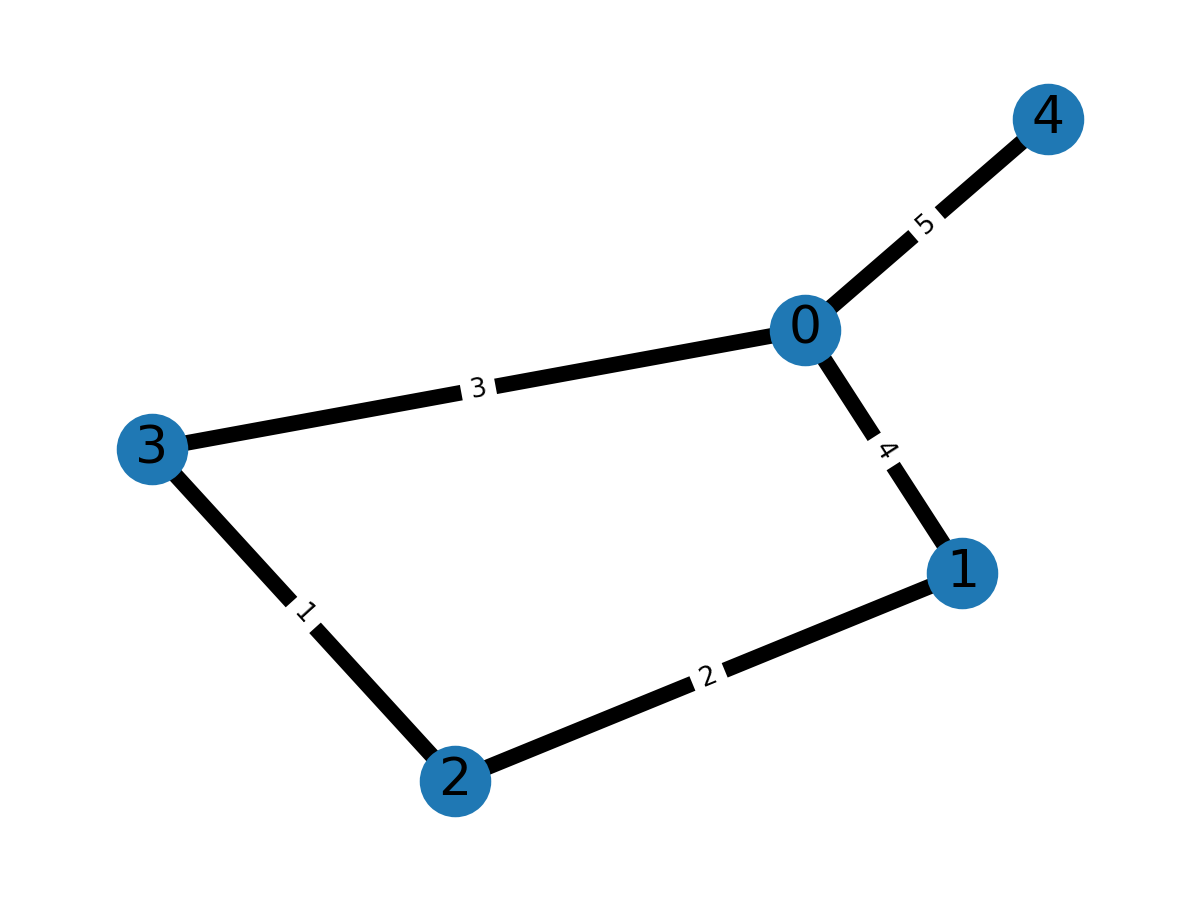

In [6]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=6)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

For prim algorithm:
1. Start with any node, add it to priority queue with initial 0 weight
2. while we have found all edges (n-1 or n if counting the root edge)
 1. pop from priority queue
 2. skip if it is chosen before
 3. add the node to result
 4. add all of its neighbors to priority queue if we haven't seen them before
 

In [7]:
from queue import PriorityQueue

def prim(G):
    nodes = list(G.nodes)
    chosen_nodes = set()
    
    edges =[]
    q = PriorityQueue()
    
    total = 0
    # Queue's record is a tuple of (weight, parent, child)
    q.put((0, None, nodes[0]))
    
    sz = G.number_of_nodes()
    while len(edges) < sz:
        w, p, c = q.get()
        if c in chosen_nodes:
            continue
        
        print(f"Choose node {c} with weight {w}")
        # save it
        edges.append((p, c))
        # mark it
        chosen_nodes.add(c)
        # update weight
        total += w
        for u, v, d in G.edges(c, data=True):
            if v in chosen_nodes:
                continue
            print(f"For node {u}, push neighbor {v} with weight:{d['weight']}")
            q.put((d['weight'], u, v))
            
    return edges, total
    

In [8]:
prim(G)

Choose node 0 with weight 0
For node 0, push neighbor 1 with weight:4
For node 0, push neighbor 4 with weight:5
For node 0, push neighbor 3 with weight:3
Choose node 3 with weight 3
For node 3, push neighbor 2 with weight:1
Choose node 2 with weight 1
For node 2, push neighbor 1 with weight:2
Choose node 1 with weight 2
Choose node 4 with weight 5


([(None, 0), (0, 3), (3, 2), (2, 1), (0, 4)], 11)

In [9]:
edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
edges

[(2, 3, {'weight': 1}),
 (1, 2, {'weight': 2}),
 (0, 3, {'weight': 3}),
 (0, 1, {'weight': 4}),
 (0, 4, {'weight': 5})]

In [10]:
from algorithm.core.utils import DisjointSet

def kruskal(G):
    result = []
    total = 0

    edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
    
    ds = DisjointSet(G.nodes)
    sz = G.number_of_nodes()
    for u, v, d in edges:
        if len(result) >= sz:
            break
        if ds.is_same(u, v):
            continue
        print(f"Add edge {(u, v)} with weight {d['weight']} to result")
        result.append((u, v))
        total += d['weight']
        ds.union(u, v)
    return result, total

In [11]:
kruskal(G)

Add edge (2, 3) with weight 1 to result
Add edge (1, 2) with weight 2 to result
Add edge (0, 3) with weight 3 to result
Add edge (0, 4) with weight 5 to result


([(2, 3), (1, 2), (0, 3), (0, 4)], 11)

In [12]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted disjoint_set.ipynb.
Converted minimum_spanning_tree.ipynb.
